# Sargam

160


<ipython-input-1-0c235fb03c16>:94: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  k = arange(n)
<ipython-input-1-0c235fb03c16>:100: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  x = fft(x) / n  # fft computing and normalization


321048


<ipython-input-1-0c235fb03c16>:94: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  k = arange(n)
<ipython-input-1-0c235fb03c16>:100: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  x = fft(x) / n  # fft computing and normalization


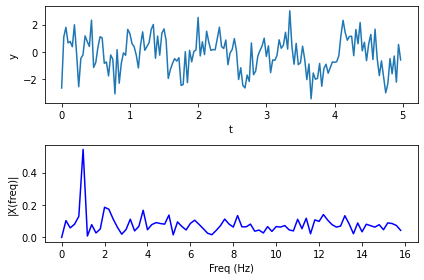

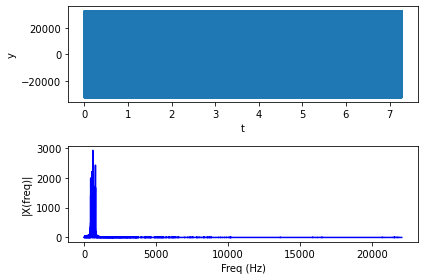

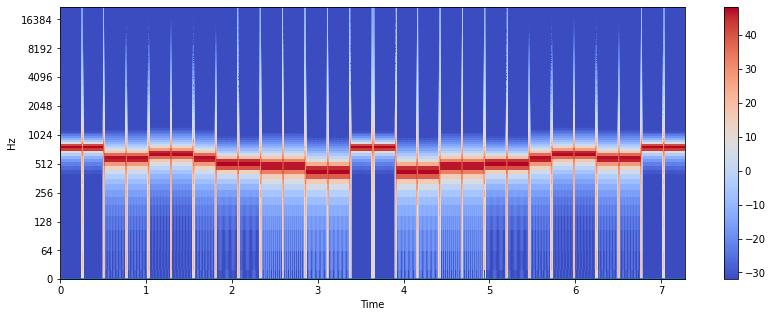

array([    0.        ,    43.06640625,    86.1328125 ,   129.19921875,
         172.265625  ,   215.33203125,   258.3984375 ,   301.46484375,
         344.53125   ,   387.59765625,   430.6640625 ,   473.73046875,
         516.796875  ,   559.86328125,   602.9296875 ,   645.99609375,
         689.0625    ,   732.12890625,   775.1953125 ,   818.26171875,
         861.328125  ,   904.39453125,   947.4609375 ,   990.52734375,
        1033.59375   ,  1076.66015625,  1119.7265625 ,  1162.79296875,
        1205.859375  ,  1248.92578125,  1291.9921875 ,  1335.05859375,
        1378.125     ,  1421.19140625,  1464.2578125 ,  1507.32421875,
        1550.390625  ,  1593.45703125,  1636.5234375 ,  1679.58984375,
        1722.65625   ,  1765.72265625,  1808.7890625 ,  1851.85546875,
        1894.921875  ,  1937.98828125,  1981.0546875 ,  2024.12109375,
        2067.1875    ,  2110.25390625,  2153.3203125 ,  2196.38671875,
        2239.453125  ,  2282.51953125,  2325.5859375 ,  2368.65234375,
      

In [1]:
def play(file): 
    import numpy as np
    import simpleaudio as sa
    from itertools import repeat

    sargamdict = {"sa":261,
                 "re":294,
                 "ga":330,
                 "ma":349,
                 "pa":392,
                 "dha":440,
                 "ni":494,
                 "sa":515}

    def play_audio(audio):# normalize to 16-bit range
        audio *= 32767 / np.max(np.abs(audio))
        # convert to 16-bit data
        audio = audio.astype(np.int16)

        # start playback
        play_obj = sa.play_buffer(audio, 1, 2, sample_rate)

        # wait for playback to finish before exiting
        play_obj.wait_done()

    T = 0.25
    sample_rate = 44100
    TxS = int(T * sample_rate)
    t = np.linspace(0, T, TxS, endpoint=False)

    Sa_note = np.sin(sargamdict["sa"] * t * 3 * np.pi)
    Re_note = np.sin(sargamdict["re"] * t * 3 * np.pi)
    Ga_note = np.sin(sargamdict["ga"] * t * 3* np.pi)
    Ma_note = np.sin(sargamdict["ma"] * t * 3 * np.pi)
    Pa_note = np.sin(sargamdict["pa"] * t * 3 * np.pi)
    Dha_note = np.sin(sargamdict["dha"] * t * 3 * np.pi)
    Ni_note = np.sin(sargamdict["ni"] * t * 3 * np.pi)
    # Sa1_note = np.sin(sargamdict["sa1"] * t * 3 * np.pi)

    get_pause  = lambda seconds: repeat(0, int(seconds * sample_rate))
    pause_note=list(get_pause(0.01))

    sargam = np.hstack((
        
                        Sa_note, pause_note, 
                        Sa_note, pause_note, 
                        Pa_note, pause_note,
                        Pa_note, pause_note,
                        Dha_note, pause_note,
                        Dha_note, pause_note,
                        Pa_note, pause_note,
                        Ma_note, pause_note,
                        Ma_note, pause_note,
                        Ga_note, pause_note,
                        Ga_note, pause_note,
                        Re_note, pause_note,
                        Re_note, pause_note,
                        Sa_note, pause_note, 

        
#                         Sa_note, pause_note,         
#                         Re_note, pause_note,
#                         Ga_note, pause_note,
#                         Ma_note, pause_note,
#                         Pa_note, pause_note,
#                         Dha_note, pause_note,
#                         Ni_note, pause_note,
                       ))

    import wavio
    fs = 44100
    s2 = np.append(sargam,sargam[::-1])

    wavio.write(file, s2, fs, scale=None, sampwidth=2)

    from scipy import fft, arange
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.io import wavfile
    import os


    def frequency_sepectrum(x, sf):
        """
        Derive frequency spectrum of a signal from time domain
        :param x: signal in the time domain
        :param sf: sampling frequency
        :returns frequencies and their content distribution
        """
        x = x - np.average(x)  # zero-centering

        n = len(x)
        print(n)
        k = arange(n)
        tarr = n / float(sf)
        frqarr = k / float(tarr)  # two sides frequency range

        frqarr = frqarr[range(n // 2)]  # one side frequency range

        x = fft(x) / n  # fft computing and normalization
        x = x[range(n // 2)]

        return frqarr, abs(x)


    # Sine sample with a frequency of 1hz and add some noise
    sr = 32  # sampling rate
    y = np.linspace(0, 2*np.pi, sr)
    y = np.tile(np.sin(y), 5)
    y += np.random.normal(0, 1, y.shape)
    t = np.arange(len(y)) / float(sr)

    plt.subplot(2, 1, 1)
    plt.plot(t, y)
    plt.xlabel('t')
    plt.ylabel('y')

    frq, X = frequency_sepectrum(y, sr)

    plt.subplot(2, 1, 2)
    plt.plot(frq, X, 'b')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|X(freq)|')
    plt.tight_layout()


    # wav sample from https://freewavesamples.com/files/Alesis-Sanctuary-QCard-Crickets.wav
    # here_path = os.path.dirname(os.path.realpath(__file__))
    # wav_file_name = 'Alesis-Sanctuary-QCard-Crickets.wav'
    # wave_file_path = os.path.join(here_path, wav_file_name)

    wave_file_path = file
    sr, signal = wavfile.read(wave_file_path)

    y = signal[:]  # use the first channel (or take their average, alternatively)
    t = np.arange(len(y)) / float(sr)

    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(t, y)
    plt.xlabel('t')
    plt.ylabel('y')

    frq, X = frequency_sepectrum(y, sr)

    plt.subplot(2, 1, 2)
    plt.plot(frq, X, 'b')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|X(freq)|')
    plt.tight_layout()

    plt.show()
    
    import librosa
    import sys
    import numpy as np
    import matplotlib.pyplot as plt
    import librosa.display

    np.set_printoptions(threshold=sys.maxsize)

    filename = file
    Fs = 44100
    clip, sample_rate = librosa.load(filename, sr=Fs)

    n_fft = 1024
    start = 0 

    hop_length=512
    X = librosa.stft(clip, n_fft=n_fft, hop_length=hop_length)
    Xdb = librosa.amplitude_to_db(abs(X))

    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=Fs, x_axis='time', y_axis='hz') 

    librosa.display.specshow(Xdb, sr=Fs, x_axis='time', y_axis='log')
    plt.colorbar()

    librosa.display.waveplot(clip, sr=Fs)
    plt.show()

    f_hertz = np.fft.rfftfreq(n_fft, 1 / Fs) 
    return f_hertz
   
    
file = "mp3/twinkle.wav"
play(file)

# import os
# os.startfile(file)

In [4]:
# os.startfile('mp3/'+os.listdir('mp3')[-1])

In [8]:
sargam = {
            "sa":261,
            "re":294,
            "ga":330,
            "ma":349,
            "pa":392,
            "dha":440,
            "ni":494,
            "sa":515
}

In [9]:
hbd = '''s   s         r   s           m      g

s   s         r   s          p    m

s   s        s*  d        m     g   r
s   s     s*  d     m m   g   r

N N         d m         p    m

s         r~  s   m       g

s         r~  s    p       m

s          s*  d m   g     r

N N       d m         p    m

s   s         r   s           m      g

s   s         r   s           p    m

s   s        s*  d      m     g   r
s   s        s*  d      m m   g   r

N N        d m          p    m
'''

In [20]:
hbdr = list(hbd.replace(' ','').lower())
hbdr

['s',
 's',
 'r',
 's',
 'm',
 'g',
 '\n',
 '\n',
 's',
 's',
 'r',
 's',
 'p',
 'm',
 '\n',
 '\n',
 's',
 's',
 's',
 '*',
 'd',
 'm',
 'g',
 'r',
 '\n',
 's',
 's',
 's',
 '*',
 'd',
 'm',
 'm',
 'g',
 'r',
 '\n',
 '\n',
 'n',
 'n',
 'd',
 'm',
 'p',
 'm',
 '\n',
 '\n',
 's',
 'r',
 '~',
 's',
 'm',
 'g',
 '\n',
 '\n',
 's',
 'r',
 '~',
 's',
 'p',
 'm',
 '\n',
 '\n',
 's',
 's',
 '*',
 'd',
 'm',
 'g',
 'r',
 '\n',
 '\n',
 'n',
 'n',
 'd',
 'm',
 'p',
 'm',
 '\n',
 '\n',
 's',
 's',
 'r',
 's',
 'm',
 'g',
 '\n',
 '\n',
 's',
 's',
 'r',
 's',
 'p',
 'm',
 '\n',
 '\n',
 's',
 's',
 's',
 '*',
 'd',
 'm',
 'g',
 'r',
 '\n',
 's',
 's',
 's',
 '*',
 'd',
 'm',
 'm',
 'g',
 'r',
 '\n',
 '\n',
 'n',
 'n',
 'd',
 'm',
 'p',
 'm',
 '\n']